<a href="https://colab.research.google.com/github/NamPham1010/Machine_Learning_SPY/blob/main/ML_Project_MA_SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
pip install xgboost

### Dataset
SPY historical dataset from yahoo finance

In [3]:
# Downloading SPY historical price data
spy = yf.Ticker("SPY")
spy_price = yf.download("SPY", start = "2015-01-01", end = "2022-12-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Loading data into dataframe
df = pd.DataFrame(spy_price)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,175.515488,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,172.345779,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,170.722427,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,172.849808,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,175.917053,147217800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,379.649994,383.059998,378.029999,382.910004,378.706635,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,377.213196,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,372.525238,70911500
2022-12-29,379.630005,384.350006,379.079987,383.440002,379.230835,66970900
2022-12-30,380.640015,382.579987,378.429993,382.429993,378.231934,84022200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2014 non-null   float64
 1   High       2014 non-null   float64
 2   Low        2014 non-null   float64
 3   Close      2014 non-null   float64
 4   Adj Close  2014 non-null   float64
 5   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,297.732294,299.417815,295.867716,297.755636,277.662368,9.187613e+07
std,80.871703,81.471799,80.177458,80.853811,86.456464,4.765484e+07
min,182.339996,184.100006,181.020004,182.860001,159.456009,2.027000e+07
25%,226.322498,226.757500,225.507496,226.255001,201.462502,6.037552e+07
50%,279.395004,280.580002,277.994995,279.330002,257.639572,7.905045e+07
75%,367.944992,370.119995,364.459999,366.842506,354.430000,1.080564e+08
max,479.220001,479.980011,476.059998,477.709991,464.923309,5.072443e+08


In [8]:
# Checking data types
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
# Setting date columnn as a regular column
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

In [10]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### Data Wrangling
Cleaning the data for analysis

In [11]:
# Checking for null values
null_values = df.isnull().sum()
print(null_values)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [13]:
# removing duplicate values
df = df.drop_duplicates()

### Creating the strategies

In [14]:
# Calculate the target variable 'Signal' for Strategy-1
df['Signal'] = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

In [15]:
# Calculating the 50 day moving averages
df["50MA"] = df["Close"].rolling(window=50).mean()

In [16]:
# Calculating the 200 day moving averages
df["200MA"] = df["Close"].rolling(window=200).mean()

In [17]:
# Creating a signal column based on moving averages crossovers
df["Signal_MA"] = np.where(df["50MA"] > df["200MA"], "Buy", "Sell")

### Data Visualization


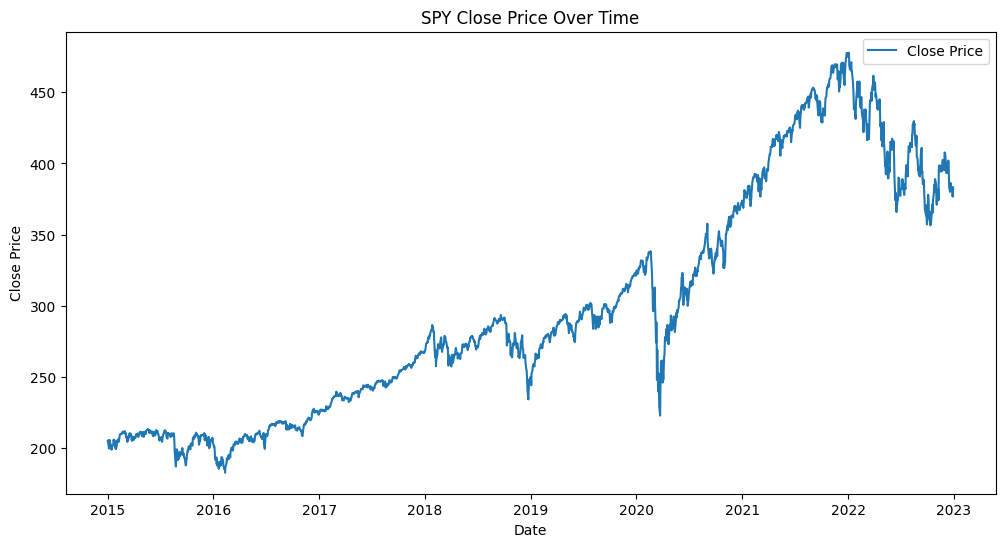

In [18]:
# Plotting SPY historical closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('SPY Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

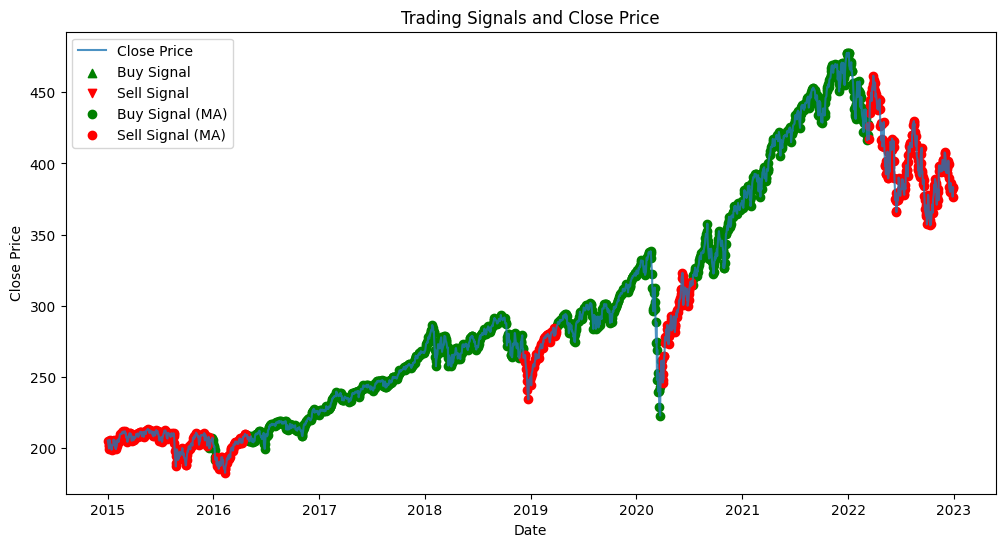

In [19]:
# Plotting the signal on SPY historical price chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the closing price
ax.plot(df['Date'], df['Close'], label='Close Price', alpha=0.8)

# Plot buy signals in green and sell signals in red for Strategy-1
buy_signals = df[df['Signal'] == 'Buy']
sell_signals = df[df['Signal'] == 'Sell']
ax.scatter(buy_signals['Date'], buy_signals['Close'], color='green', label='Buy Signal', marker='^', alpha=1)
ax.scatter(sell_signals['Date'], sell_signals['Close'], color='red', label='Sell Signal', marker='v', alpha=1)

# Plot buy signals in blue and sell signals in orange for Strategy-2
buy_signals_ma = df[df['Signal_MA'] == 'Buy']
sell_signals_ma = df[df['Signal_MA'] == 'Sell']
ax.scatter(buy_signals_ma['Date'], buy_signals_ma['Close'], color='green', label='Buy Signal (MA)', marker='o', alpha=1)
ax.scatter(sell_signals_ma['Date'], sell_signals_ma['Close'], color='red', label='Sell Signal (MA)', marker='o', alpha=1)

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Trading Signals and Close Price')
ax.legend()
plt.show()


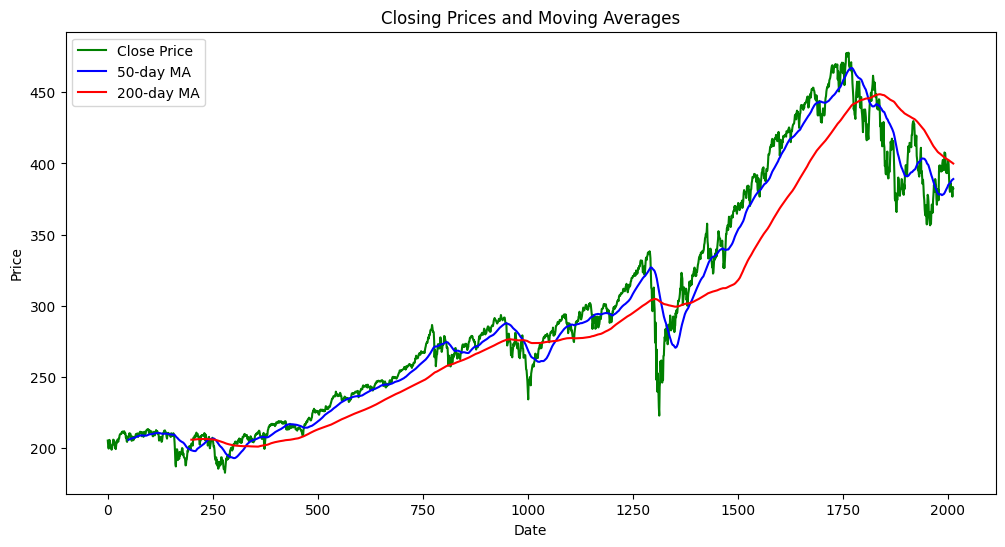

In [20]:
# Plotting the MA on SPY chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Close'], label='Close Price', color='green')
sns.lineplot(x=df.index, y=df['50MA'], label='50-day MA', color='blue')
sns.lineplot(x=df.index, y=df['200MA'], label='200-day MA', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Prices and Moving Averages')
plt.legend()
plt.show()

### Implementing machine learning models

In [21]:
# Creating feature variables
feature_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Creating a new df with feature variables
X = df[feature_columns]

# Setting the target variables
y = df["Signal"]

In [22]:
# Standardizing the data
scaler = StandardScaler()

# Fit and transform the feature variables
X = scaler.fit_transform(X)

In [23]:
# Split the data into training and test sets using 80/20 percent ratio (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Applying KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict_knn = knn_classifier.predict(X_test)

# Evaluate
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print("K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(classification_report(y_test, y_predict_knn))
print(confusion_matrix(y_test, y_predict_knn))

K-Nearest Neighbors Classifier:
Accuracy: 0.47
              precision    recall  f1-score   support

          -1       0.46      0.46      0.46       197
           1       0.48      0.48      0.48       206

    accuracy                           0.47       403
   macro avg       0.47      0.47      0.47       403
weighted avg       0.47      0.47      0.47       403

[[ 90 107]
 [107  99]]


In [25]:
# Applying Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict_rf = rf_classifier.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_predict_rf))
print(confusion_matrix(y_test, y_predict_rf))


Random Forest Classifier:
Accuracy: 0.47
              precision    recall  f1-score   support

          -1       0.44      0.34      0.38       197
           1       0.48      0.60      0.53       206

    accuracy                           0.47       403
   macro avg       0.46      0.47      0.46       403
weighted avg       0.46      0.47      0.46       403

[[ 66 131]
 [ 83 123]]


In [26]:
# Applying Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict_gb = gb_classifier.predict(X_test)

# Evaluate
accuracy_gb = accuracy_score(y_test, y_predict_gb)
print("Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(classification_report(y_test, y_predict_gb))
print(confusion_matrix(y_test, y_predict_gb))


Gradient Boosting Classifier:
Accuracy: 0.47
              precision    recall  f1-score   support

          -1       0.43      0.23      0.30       197
           1       0.49      0.70      0.58       206

    accuracy                           0.47       403
   macro avg       0.46      0.47      0.44       403
weighted avg       0.46      0.47      0.44       403

[[ 46 151]
 [ 61 145]]


In [27]:
# Applying SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_predict_svm = svm_classifier.predict(X_test)

# Evaluate
accuracy_svm = accuracy_score(y_test, y_predict_svm)
print("Support Vector Machines (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(classification_report(y_test, y_predict_svm))
print(confusion_matrix(y_test, y_predict_svm))

Support Vector Machines (SVM) Classifier:
Accuracy: 0.51
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       197
           1       0.51      1.00      0.68       206

    accuracy                           0.51       403
   macro avg       0.26      0.50      0.34       403
weighted avg       0.26      0.51      0.35       403

[[  0 197]
 [  0 206]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Map -1 to 0 and 1 to 1 in the target variable 'y' as xgboost expect binary class labels
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})

# Applying XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the classifier to the training data with the mapped labels
xgb_classifier.fit(X_train, y_train_mapped)

# Make predictions on the test data
y_predict_xgb = xgb_classifier.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test_mapped, y_predict_xgb)
print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(classification_report(y_test_mapped, y_predict_xgb))
print(confusion_matrix(y_test_mapped, y_predict_xgb))


XGBoost Classifier:
Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.46      0.36      0.41       197
           1       0.50      0.60      0.54       206

    accuracy                           0.48       403
   macro avg       0.48      0.48      0.47       403
weighted avg       0.48      0.48      0.48       403

[[ 71 126]
 [ 82 124]]


### Extra Credit
Tuning a classifier

In [29]:
from sklearn.model_selection import GridSearchCV

# Applying the KNN classifier
knn_classifier = KNeighborsClassifier()

# Tuning the parameters
parameters = {
    'n_neighbors': [2, 4, 6, 8],
    'weights': ['uniform', 'distance'],
    'p': [6, 8],
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=parameters, cv=5, scoring='accuracy')

# Fit the grid to training data
grid_search_knn.fit(X_train, y_train)

# Getting the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

# Training the KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params_knn)
best_knn_classifier.fit(X_train, y_train)

# Prediction on the test data
y_pred_knn = best_knn_classifier.predict(X_test)

# Evaluate the tuned KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Tuned K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")


Best Hyperparameters for KNN: {'n_neighbors': 4, 'p': 8, 'weights': 'distance'}
Tuned K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.47
